## 1. Importing Libraries


In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score,precision_score,f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

## 2. Loading and Exploring the Data

In [3]:
df = pd.read_csv('data/framingham.csv')

In [11]:
# df.info()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
df['male'].value_counts()
df['currentSmoker'].value_counts()

currentSmoker
0    2144
1    2094
Name: count, dtype: int64

## 3. Data Cleaning and Preparation

In [21]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## 4. Model Building and Training


In [128]:
df.dropna(inplace=True)

In [150]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='diabetes'),df['diabetes'],test_size=0.25,random_state=0)

### Liblinear model

In [194]:
model_1 = LogisticRegression(solver='liblinear') # With newton-cg is the same result
model_1.fit(x_train,y_train)
predictions_1 = model_1.predict(x_test)

# If I reduce the tol, the model adapt better to the train_data but it's overfitting, so tol per default is ok

In [195]:
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       896
           1       0.75      0.50      0.60        18

    accuracy                           0.99       914
   macro avg       0.87      0.75      0.80       914
weighted avg       0.99      0.99      0.99       914



In [196]:
confusion_matrix(y_test,predictions_1)

array([[893,   3],
       [  9,   9]], dtype=int64)

## 5. Model Evaluation

### ROC Curve

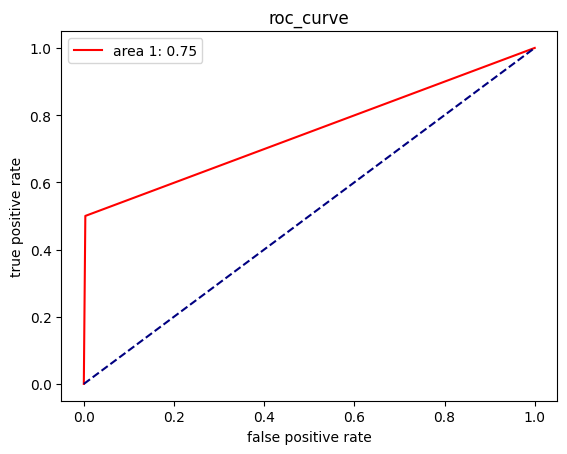

In [200]:
fpr, tpr, _ = roc_curve(y_test,predictions_1)

area_1 = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',label=f'area 1: {area_1:.2f}')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc_curve')
plt.legend()
plt.show()
